# Preparations

## Import useful modules

## What is the topic and why is it important (10%)

According to Yuan Zhe:"**DO YOU EAT VEGETABLES?** If you say yes, this topic is **important**."

The amount of water a plant uptakes has a significant impact on its rate of growth [(Kabir et al., 2021)](https://www.sciencedirect.com/science/article/pii/S0304423821000091). 

Being able to predict plant growth rates under different levels of irrigation leads to greater efficiency in biomass production, allowing more food to be produced more efficiently [(Wang et al., 2022)](https://www.frontiersin.org/articles/10.3389/fpls.2022.1069190).

The optimal growth environments for plants that are being conserved can also be predicted with this model, allowing more effective conservation efforts for endangered species of plants [(Meier et al., 2017)](http://www.jstor.org/stable/45220869).
As the water availability changes globally as a result of global warming, understanding how plants respond to variation in irrigation level may help in predicting how plant life is likely to be affected [(Kaini et al., 2022)](https://www.mdpi.com/2073-4441/14/17/2728).
Different plants have different growth characteristics and optimal water conditions to grow at. This model will be useful for farmers to predict the growth of specific plants in specific environment conditions.

By modeling the impact of water availability on plant growth rates using Python, we can predict the optimal water conditions that ensures maxmium plant growth, ultimately contributing to agricultural production, conservation and understanding how plant respond to climate change.

In [1]:
import numpy as np                                    # I don't believe we need this yet: remove this comment if we use np.
from matplotlib import pyplot as plt                  # Obviously used for plotting

# Verifying [Paper](https://www.mdpi.com/2227-7390/10/1/151) Assertions / Assumptions

## Checking how n value affects x(t) [independent of w(t) and v(t)]

In [our paper of interest](https://www.mdpi.com/2227-7390/10/1/151), one of the parameters, n, which represents the extent of plant growth in response to the presence of water, is postulated to be able to take a range of values. Our paper claims that there are certain restrictions on this value of n, such that it should lie in the range (0, 1] to feasibly represent real-world situations. We can see below, in an attached figure from [the paper](https://www.mdpi.com/2227-7390/10/1/151), that n = 0.8 and n = 1 best represent how we would expect plant dry mass, x(t), to change over time.
![](https://www.mdpi.com/mathematics/mathematics-10-00151/article_deploy/html/images/mathematics-10-00151-g002.png)

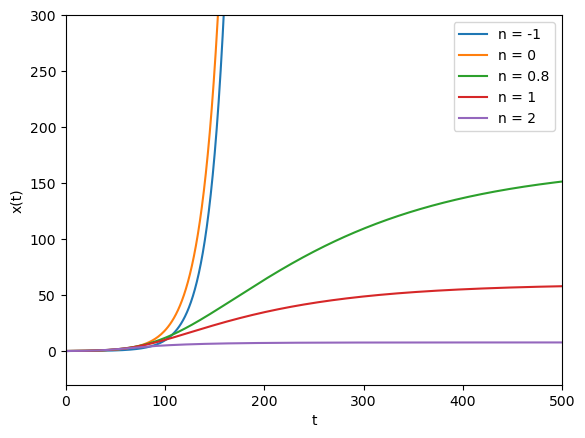

In [2]:
def check_x_n(n):
    
    omega = 0.07                       # variables used for plotting in the paper
    g = 0.1
    m = 0.01
    
    time_hold = [a for a in range(501)]      # hold all time values
    x_hold = [0.1]                           # hold all x values. Initial x value is 0.1 (arbitrarily)
    
    for timepoint in time_hold[1:]:
        last_x = x_hold[-1]
        x_change = omega * last_x / (1 + g * last_x**n) - m * last_x 
        new_x = last_x + x_change
        x_hold.append(new_x)
    return (time_hold, x_hold)

n_vals = [-1, 0, 0.8, 1, 2]            # different values of n for comparison

for n_val in n_vals:
    time, x = check_x_n(n_val)
    plt.plot(time, x, label = f'n = {n_val}')

plt.ylim(-30, 300)
plt.xlim(0, 500)
plt.ylabel("x(t)")
plt.xlabel("t")
plt.legend()
plt.show()

## More ideas on what else is important to verify for ourselves? WIP

# Actual Modelling of Plant Growth

## Initial Model Code --- For clarity and reference

There is an example given in our paper of x(t), w(t) and v(t) values over time based on this model. We attempt to replicate it.
![](https://www.mdpi.com/mathematics/mathematics-10-00151/article_deploy/html/images/mathematics-10-00151-g005.png)

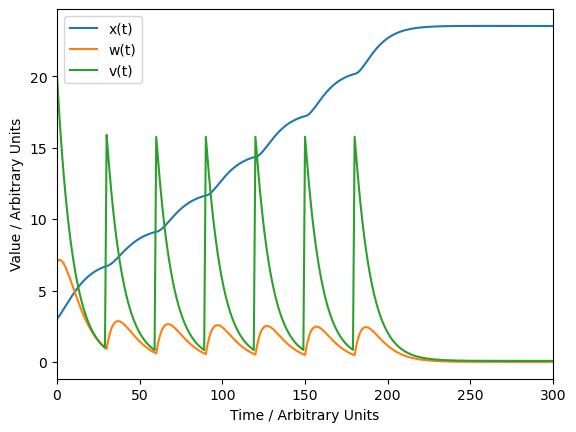

In [3]:
### Initialising Variables ###

intrin_growth = 0.01             # kappa
limit_factor_x = 0.1             # g
degrade_rate = 0.00001           # m
intrin_water_inc = 1             # delta
limit_factor_w = 20              # r
plant_water_dec = 0.1            # beta
intrin_water_dec = 0.01          # k
pond_water_dec = 0.000009        # gamma
intrin_water_uptake = 2          # p
n = 1                            # extent of plant growth response to water
x_0 = 3                          # x(0)
w_0 = 7                          # w(0)
v_0 = 20                         # v(0)
time_endpoint = 300              # arbitrary time units
time_intervals = 1               # should always be 1
'''
Our time_intervals should always be 1, because our time_endpoint will just tell us
the number of ticks we run through. None of the time values have any reference to the
real world at the moment, so we just treat them as clock ticks
'''
hold_timepoints = [timepoint for timepoint in range(0, time_endpoint+1, time_intervals)]        # timepoints
hold_x_val = [x_0]               # all x(t) values
hold_w_val = [w_0]               # all w(t) values
hold_v_val = [v_0]               # all v(t) values


### Producing x(t), w(t), and v(t) values ###

for timepoint in hold_timepoints[1:]:          # going through every timepoint (except t = 0)
    
    last_x = hold_x_val[-1]                    # find the x, w, v at the most recent timepoint
    last_w = hold_w_val[-1]
    last_v = hold_v_val[-1]
    
    lump_1 = last_x * last_w / (1 + limit_factor_x * last_x**n)                           # complicated fraction 1 (n value included)
    lump_2 = intrin_water_inc * last_w * last_v / (1 + limit_factor_w * last_w)           # complicated fraction 2
    
    # following the formulae given in the ppaer
    x_change = intrin_growth * lump_1 - degrade_rate * last_x
    w_change = lump_2 - plant_water_dec * last_w - intrin_water_dec * lump_1
    v_change = -pond_water_dec * last_v - intrin_water_uptake * lump_2
    
    if timepoint < 200:                        # optional irrigation, based on given paper parameters
        if timepoint % 30 == 0:             
            v_change += 15
    
    new_x = last_x + x_change                  # new x(t), w(t), and v(t) values created
    new_w = last_w + w_change
    new_v = last_v + v_change
    
    hold_x_val.append(new_x)                   # add new values to our holding lists
    hold_w_val.append(new_w)
    hold_v_val.append(new_v)
   
### Plotting ###

plt.plot(hold_timepoints, hold_x_val, label = "x(t)")
plt.plot(hold_timepoints, hold_w_val, label = "w(t)")
plt.plot(hold_timepoints, hold_v_val, label = "v(t)")
plt.ylabel("Value / Arbitrary Units")
plt.xlabel("Time / Arbitrary Units")
plt.xlim(0, time_endpoint)
plt.legend()
plt.show()

## We made it a function!

In [4]:
def plot_plant_growth(x_0, w_0, v_0, time_endpoint = 300, irrigate = False):
    '''
    A function that takes in initial values of x(0), w(0), and v(0).
    Also takes in 2 optional arguments time_endpoint, an integer representing the number of ticks to run the program for.
    Second optional argument, irrigate, is a boolean that tells the function whether or not to irrigate the plant.
    Default parameters for these 2 arguments are 300 and False, respectively.
    Output is obvious: it just plots x(t), w(t), and v(t) over time.
    '''
    
    # Default Variables --- Subject to change possibly #
    
    intrin_growth = 0.01             # kappa
    limit_factor_x = 0.1             # g
    degrade_rate = 0.00001           # m
    intrin_water_inc = 1             # delta
    limit_factor_w = 20              # r
    plant_water_dec = 0.1            # beta
    intrin_water_dec = 0.01          # k
    pond_water_dec = 0.000009        # gamma
    intrin_water_uptake = 2          # p
    n = 1                            # extent of plant growth response to water

    # Generating our lists to hold all relevant values #
    
    hold_timepoints = [timepoint for timepoint in range(0, time_endpoint+1)]
    hold_x_val = [x_0]
    hold_w_val = [w_0]
    hold_v_val = [v_0]


    ### Filling up our lists of values ###

    for timepoint in hold_timepoints[1:]:          # going through every timepoint

        last_x = hold_x_val[-1]                    # find the x, w, v at the last timepoint
        last_w = hold_w_val[-1]
        last_v = hold_v_val[-1]

        lump_1 = last_x * last_w / (1 + limit_factor_x * last_x**n)
        lump_2 = intrin_water_inc * last_w * last_v / (1 + limit_factor_w * last_w)


        x_change = intrin_growth * lump_1 - degrade_rate * last_x
        w_change = lump_2 - plant_water_dec * last_w - intrin_water_dec * lump_1
        v_change = -pond_water_dec * last_v - intrin_water_uptake * lump_2

        if irrigate:                                # if the input tells us to irrigate    
            
            ### Irrigation Variables ###
            start_irrigation, end_irrigation = 0, 200
            irrigation_interval = 30
            irrigation_amount = 15
            
            ### Irrigation Process ###
            if start_irrigation < timepoint < end_irrigation:
                if timepoint % irrigation_interval == 0:             
                    v_change += irrigation_amount

        new_x = last_x + x_change
        new_w = last_w + w_change
        new_v = last_v + v_change

        hold_x_val.append(new_x)
        hold_w_val.append(new_w)
        hold_v_val.append(new_v)

    plt.plot(hold_timepoints, hold_x_val, label = "x(t)")
    plt.plot(hold_timepoints, hold_w_val, label = "w(t)")
    plt.plot(hold_timepoints, hold_v_val, label = "v(t)")
    plt.ylabel("Value / Arbitrary Units")
    plt.xlabel("Time / Arbitrary Units")
    plt.xlim(0, time_endpoint)
    plt.legend()
    plt.show()

### Verifying our function produces the same output as before

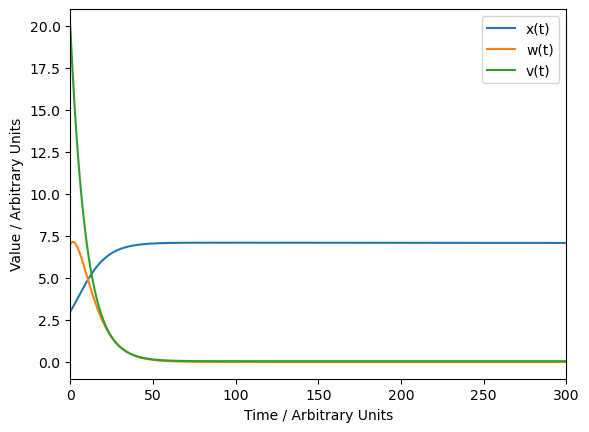

In [5]:
plot_plant_growth(3, 7, 20, irrigate = False)

## We allowed the function to take in different environmental parameters!

In [6]:
def make_plotter(param_iter = (0.01, 0.1, 0.00001, 1, 20, 0.1, 0.01, 0.000009, 2, 1)):
    '''
    A function that takes in an iterable param_iter of parameter values.
    Returns a plotter function that then takes in x(0), w(0), v(0), time_endpoint, and an irrigate boolean.
    This input iterable should consist of 10 items:
    (kappa, g, m, delta, r, beta, k, gamma, p, n)
    If you want to use default values for the parameters, call this function without an input parameter.
    The default values are:
    (0.01, 0.01, 0.00001, 1, 20, 0.1, 0.01, 0.000009, 2, 1)
    '''
    def plot_plant_growth(x_0, w_0, v_0, time_endpoint = 300, irrigate = False):
        '''
        A function that takes in initial values of x(0), w(0), and v(0).
        Also takes in 2 optional arguments time_endpoint, an integer representing the number of ticks to run the program for.
        Second optional argument, irrigate, is a boolean that tells the function whether or not to irrigate the plant.
        Default parameters for these 2 arguments are 300 and False, respectively.
        Output is obvious: it just plots x(t), w(t), and v(t) over time.
        '''

        # Default Variables --- Only changeable by make_plotter() #
        
        intrin_growth = param_iter[0]          # kappa
        limit_factor_x = param_iter[1]         # g
        degrade_rate = param_iter[2]           # m
        intrin_water_inc = param_iter[3]       # delta
        limit_factor_w = param_iter[4]         # r
        plant_water_dec = param_iter[5]        # beta
        intrin_water_dec = param_iter[6]       # k
        pond_water_dec = param_iter[7]         # gamma
        intrin_water_uptake = param_iter[8]    # p
        n = param_iter[9]                      # extent of plant growth response to water
        
        
        # Generating our lists to hold all relevant values #

        hold_timepoints = [timepoint for timepoint in range(0, time_endpoint+1)]
        hold_x_val = [x_0]
        hold_w_val = [w_0]
        hold_v_val = [v_0]


        ### Filling up our lists of values ###

        for timepoint in hold_timepoints[1:]:          # going through every timepoint

            last_x = hold_x_val[-1]                    # find the x, w, v at the last timepoint
            last_w = hold_w_val[-1]
            last_v = hold_v_val[-1]

            lump_1 = last_x * last_w / (1 + limit_factor_x * last_x**n)
            lump_2 = intrin_water_inc * last_w * last_v / (1 + limit_factor_w * last_w)


            x_change = intrin_growth * lump_1 - degrade_rate * last_x
            w_change = lump_2 - plant_water_dec * last_w - intrin_water_dec * lump_1
            v_change = -pond_water_dec * last_v - intrin_water_uptake * lump_2

            if irrigate:                                # if the input tells us to irrigate    

                ### Irrigation Variables ###
                start_irrigation, end_irrigation = 0, 200
                irrigation_interval = 30
                irrigation_amount = 15

                ### Irrigation Process ###
                if start_irrigation < timepoint < end_irrigation:
                    if timepoint % irrigation_interval == 0:             
                        v_change += irrigation_amount

            new_x = last_x + x_change
            new_w = last_w + w_change
            new_v = last_v + v_change

            hold_x_val.append(new_x)
            hold_w_val.append(new_w)
            hold_v_val.append(new_v)

        plt.plot(hold_timepoints, hold_x_val, label = "x(t)")
        plt.plot(hold_timepoints, hold_w_val, label = "w(t)")
        plt.plot(hold_timepoints, hold_v_val, label = "v(t)")
        plt.ylabel("Value / Arbitrary Units")
        plt.xlabel("Time / Arbitrary Units")
        plt.xlim(0, time_endpoint)
        plt.legend()
        plt.show()
    return plot_plant_growth

In [7]:
help(make_plotter)

Help on function make_plotter in module __main__:

make_plotter(param_iter=(0.01, 0.1, 1e-05, 1, 20, 0.1, 0.01, 9e-06, 2, 1))
    A function that takes in an iterable param_iter of parameter values.
    Returns a plotter function that then takes in x(0), w(0), v(0), time_endpoint, and an irrigate boolean.
    This input iterable should consist of 10 items:
    (kappa, g, m, delta, r, beta, k, gamma, p, n)
    If you want to use default values for the parameters, call this function without an input parameter.
    The default values are:
    (0.01, 0.01, 0.00001, 1, 20, 0.1, 0.01, 0.000009, 2, 1)



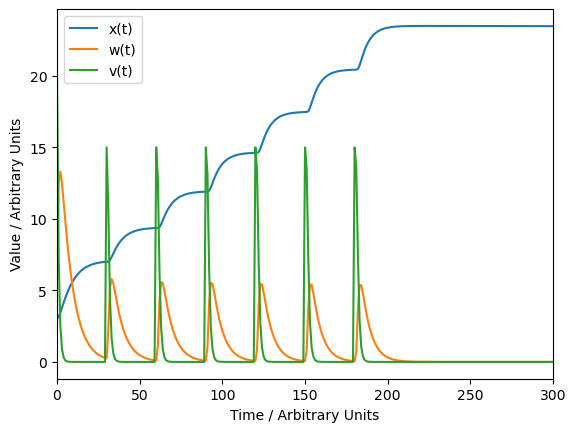

In [8]:
trial_params = [0.01, 0.1, 0.00001, 1, 3, 0.1, 0.01, 0.000009, 2, 1]
trial_plotter = make_plotter(trial_params)
trial_plotter(3,7,20, irrigate = True, time_endpoint = 300)

# Improving the Model

## Checking for values below 0

The most obvious change we can make to our model is to include a check for certain components of our model, such that their values never fall below 0. Not checking for these cases results in some errors when using specific parameter values, as shown below by the example of setting $r$, the limiting factor constant of $w(t)$ from 20 to 1:

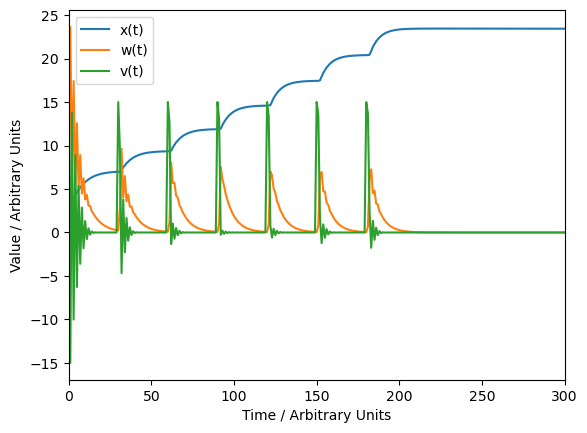

In [9]:
trial_params = (0.01, 0.1, 0.00001, 1, 1, 0.1, 0.01, 0.000009, 2, 1)
trial_plotter = make_plotter(trial_params)
trial_plotter(3,7,20, irrigate = True)

In this example, the lack of checking for negative v(t) values in the presence of a high $k$ causes w(t) to oscillate wildly between positive and negative values. To change this, we could modify our model with simple if-else conditions. We know in reality that dry mass of a plant, mass of water in a plant, and mass of water in the soil will never be negative. As such, we simply incorporate new if-else conditionals that set x(t), w(t), or v(t) to 0 when they are negative.

In [10]:
def make_plotter(param_iter = (0.01, 0.1, 0.00001, 1, 20, 0.1, 0.01, 0.000009, 2, 1)):
    '''
    A function that takes in an iterable param_iter of parameter values.
    Returns a plotter function that then takes in x(0), w(0), v(0), time_endpoint, and an irrigate boolean.
    This input iterable should consist of 10 items:
    (kappa, g, m, delta, r, beta, k, gamma, p, n)
    If you want to use default values for the parameters, call this function without an input parameter.
    The default values are:
    (0.01, 0.01, 0.00001, 1, 20, 0.1, 0.01, 0.000009, 2, 1)
    '''
    def plot_plant_growth(x_0, w_0, v_0, time_endpoint = 300, irrigate = False):
        '''
        A function that takes in initial values of x(0), w(0), and v(0).
        Also takes in 2 optional arguments time_endpoint, an integer representing the number of ticks to run the program for.
        Second optional argument, irrigate, is a boolean that tells the function whether or not to irrigate the plant.
        Default parameters for these 2 arguments are 300 and False, respectively.
        Output is obvious: it just plots x(t), w(t), and v(t) over time.
        '''

        # Default Variables --- Only changeable by make_plotter() #
        
        intrin_growth = param_iter[0]          # kappa
        limit_factor_x = param_iter[1]         # g
        degrade_rate = param_iter[2]           # m
        intrin_water_inc = param_iter[3]       # delta
        limit_factor_w = param_iter[4]         # r
        plant_water_dec = param_iter[5]        # beta
        intrin_water_dec = param_iter[6]       # k
        pond_water_dec = param_iter[7]         # gamma
        intrin_water_uptake = param_iter[8]    # p
        n = param_iter[9]                      # extent of plant growth response to water
        
        
        # Generating our lists to hold all relevant values #

        hold_timepoints = [timepoint for timepoint in range(0, time_endpoint+1)]
        hold_x_val = [x_0]
        hold_w_val = [w_0]
        hold_v_val = [v_0]


        ### Filling up our lists of values ###

        for timepoint in hold_timepoints[1:]:          # going through every timepoint

            last_x = hold_x_val[-1]                    # find the x, w, v at the last timepoint
            last_w = hold_w_val[-1]
            last_v = hold_v_val[-1]

            lump_1 = last_x * last_w / (1 + limit_factor_x * last_x**n)
            lump_2 = intrin_water_inc * last_w * last_v / (1 + limit_factor_w * last_w)


            x_change = intrin_growth * lump_1 - degrade_rate * last_x
            w_change = lump_2 - plant_water_dec * last_w - intrin_water_dec * lump_1
            v_change = -pond_water_dec * last_v - intrin_water_uptake * lump_2

            if irrigate:                                # if the input tells us to irrigate    

                ### Irrigation Variables ###
                start_irrigation, end_irrigation = 0, 200
                irrigation_interval = 30
                irrigation_amount = 15

                ### Irrigation Process ###
                if start_irrigation < timepoint < end_irrigation:
                    if timepoint % irrigation_interval == 0:             
                        v_change += irrigation_amount

            new_x = last_x + x_change
            new_w = last_w + w_change
            new_v = last_v + v_change
            
            if new_x < 0:                      # checking for negative x(t)
                new_x = 0
            if new_w < 0:                      # check negative w(t)
                new_w = 0
            if new_v < 0:                      # check negative v(t)
                new_v = 0
                
            hold_x_val.append(new_x)
            hold_w_val.append(new_w)
            hold_v_val.append(new_v)

        plt.plot(hold_timepoints, hold_x_val, label = "x(t)")
        plt.plot(hold_timepoints, hold_w_val, label = "w(t)")
        plt.plot(hold_timepoints, hold_v_val, label = "v(t)")
        plt.ylabel("Value / Arbitrary Units")
        plt.xlabel("Time / Arbitrary Units")
        plt.xlim(0, time_endpoint)
        plt.legend()
        plt.show()
    return plot_plant_growth

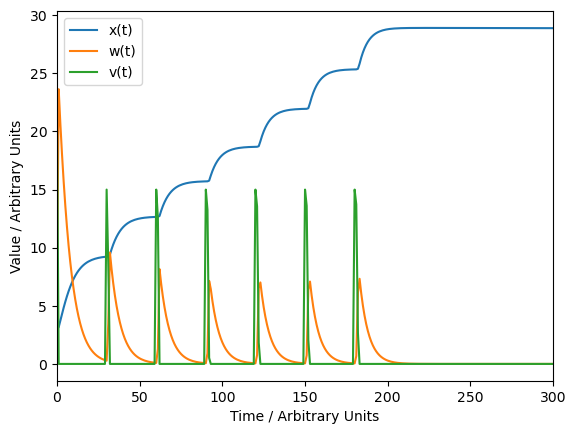

In [11]:
trial_params = (0.01, 0.1, 0.00001, 1, 1, 0.1, 0.01, 0.000009, 2, 1)
trial_plotter = make_plotter(trial_params)
trial_plotter(3,7,20, irrigate = True)

With the addition of these conditionals, we now see that our graph makes much more sense! Changing the value of $r$ from 20 to 1 is logically possible, as it simply sets a lower restriction on the rate at which $w(t)$ can change, but the previous model was unable to handle this. Now we can play around with our model with the assurance that it won't create negative numbers where it shouldn't!

## Relating rho and delta to the same variable

The model of interest takes in $\rho$ (p) and $\delta$ (delta) as separate variables, where $\delta$ is the intrinsic rate of increase of water in the plant, and $\rho$ is the intrinsic rate of water that goes from the soil to the plant. This paper further states its assumption that $\delta \leq \rho$. However, it only makes sense to assume that all the water lost from the soil to the plant must necessarily contribute to water within the plant, since the only method for this water transport to occur is through root uptake by the plant.

We propose a modification to this model that removes the parameter $\rho$ entirely and simply uses the $\delta$ parameter in place of the $\rho$ parameter. For this updated default parameter $\delta$, we propose an intermediate value of 1.5. The updated function is as shown below.

In [12]:
def make_plotter(param_iter = (0.01, 0.1, 0.00001, 1.5, 20, 0.1, 0.01, 0.000009, 1)):
    '''
    A function that takes in an iterable param_iter of parameter values.
    Returns a plotter function that then takes in x(0), w(0), v(0), time_endpoint, and an irrigate boolean.
    This input iterable should consist of 9 items:
    (kappa, g, m, delta, r, beta, k, gamma, n)
    If you want to use default values for the parameters, call this function without an input parameter.
    The default values are:
    (0.01, 0.01, 0.00001, 1, 20, 0.1, 0.01, 0.000009, 1)
    '''
    def plot_plant_growth(x_0, w_0, v_0, time_endpoint = 300, irrigate = False):
        '''
        A function that takes in initial values of x(0), w(0), and v(0).
        Also takes in 2 optional arguments time_endpoint, an integer representing the number of ticks to run the program for.
        Second optional argument, irrigate, is a boolean that tells the function whether or not to irrigate the plant.
        Default parameters for these 2 arguments are 300 and False, respectively.
        Output is obvious: it just plots x(t), w(t), and v(t) over time.
        '''

        # Default Variables --- Only changeable by make_plotter() #
        
        intrin_growth = param_iter[0]          # kappa
        limit_factor_x = param_iter[1]         # g
        degrade_rate = param_iter[2]           # m
        intrin_water_inc = param_iter[3]       # delta
        limit_factor_w = param_iter[4]         # r
        plant_water_dec = param_iter[5]        # beta
        intrin_water_dec = param_iter[6]       # k
        pond_water_dec = param_iter[7]         # gamma
        n = param_iter[8]                      # extent of plant growth response to water
        
        
        # Generating our lists to hold all relevant values #

        hold_timepoints = [timepoint for timepoint in range(0, time_endpoint+1)]
        hold_x_val = [x_0]
        hold_w_val = [w_0]
        hold_v_val = [v_0]


        ### Filling up our lists of values ###

        for timepoint in hold_timepoints[1:]:          # going through every timepoint

            last_x = hold_x_val[-1]                    # find the x, w, v at the last timepoint
            last_w = hold_w_val[-1]
            last_v = hold_v_val[-1]

            lump_1 = last_x * last_w / (1 + limit_factor_x * last_x**n)
            lump_2 = intrin_water_inc * last_w * last_v / (1 + limit_factor_w * last_w)


            x_change = intrin_growth * lump_1 - degrade_rate * last_x
            w_change = lump_2 - plant_water_dec * last_w - intrin_water_dec * lump_1
            v_change = -pond_water_dec * last_v - intrin_water_inc * lump_2

            if irrigate:                                # if the input tells us to irrigate    

                ### Irrigation Variables ###
                start_irrigation, end_irrigation = 0, 200
                irrigation_interval = 30
                irrigation_amount = 15

                ### Irrigation Process ###
                if start_irrigation < timepoint < end_irrigation:
                    if timepoint % irrigation_interval == 0:             
                        v_change += irrigation_amount

            new_x = last_x + x_change
            new_w = last_w + w_change
            new_v = last_v + v_change
            
            if new_x < 0:                      # checking for negative x(t)
                new_x = 0
            if new_w < 0:                      # check negative w(t)
                new_w = 0
            if new_v < 0:                      # check negative v(t)
                new_v = 0
                
            hold_x_val.append(new_x)
            hold_w_val.append(new_w)
            hold_v_val.append(new_v)

        plt.plot(hold_timepoints, hold_x_val, label = "x(t)")
        plt.plot(hold_timepoints, hold_w_val, label = "w(t)")
        plt.plot(hold_timepoints, hold_v_val, label = "v(t)")
        plt.ylabel("Value / Arbitrary Units")
        plt.xlabel("Time / Arbitrary Units")
        plt.xlim(0, time_endpoint)
        plt.legend()
        plt.show()
    return plot_plant_growth

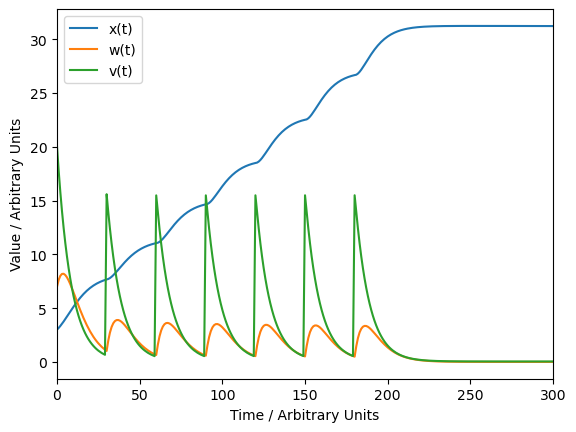

In [13]:
default_plotter = make_plotter()
default_plotter(3,7,20, irrigate = True)

The graph plotted by this new function still makes sense, and doesn't contradict any of our understandings regarding what plant growth should look like. It does look slightly different from the default graph of our previous model, but that's not a big problem :)

## Changing irrigation guidelines

The only rules for irrigation we have used so far are a fixed set of rules that are taken from the model that we are adapting. The irrigation rules as laid out in this paper are to irrigate in intervals of 30 time units from time 0 to 200, and to add 15 units of water to the external soil. 

We propose a different rationale behind watering guidelines: we will irrigate the plant whenever the amount of water in the soil falls below a certain threshold. This more closely emulates [the watering processes used in agriculture](https://cals.arizona.edu/extension/ornamentalhort/waterquality/irrigation_when.pdf), and is hence a more useful way to build our model. To accommodate the specification of a threshold and watering quantity, we will change our model to take in 2 new variables, v_threshold and irrigation_qty.

In [14]:
def make_plotter(param_iter = (0.01, 0.1, 0.00001, 1.5, 20, 0.1, 0.01, 0.000009, 1, 2, 15)):
    '''
    A function that takes in an iterable param_iter of parameter values.
    Returns a plotter function that then takes in x(0), w(0), v(0), time_endpoint, and an irrigate boolean.
    This input iterable should consist of 11 items:
    (kappa, g, m, delta, r, beta, k, gamma, n, v_threshold, irrigation_qty)
    If you want to use default values for the parameters, call this function without an input parameter.
    The default values are:
    (0.01, 0.01, 0.00001, 1, 20, 0.1, 0.01, 0.000009, 1, 2, 15)
    '''
    def plot_plant_growth(x_0, w_0, v_0, time_endpoint = 300, irrigate = False):
        '''
        A function that takes in initial values of x(0), w(0), and v(0).
        Also takes in 2 optional arguments time_endpoint, an integer representing the number of ticks to run the program for.
        Second optional argument, irrigate, is a boolean that tells the function whether or not to irrigate the plant.
        Default parameters for these 2 arguments are 300 and False, respectively.
        Output is obvious: it just plots x(t), w(t), and v(t) over time.
        '''

        # Default Variables --- Only changeable by make_plotter() #
        
        intrin_growth = param_iter[0]          # kappa
        limit_factor_x = param_iter[1]         # g
        degrade_rate = param_iter[2]           # m
        intrin_water_inc = param_iter[3]       # delta
        limit_factor_w = param_iter[4]         # r
        plant_water_dec = param_iter[5]        # beta
        intrin_water_dec = param_iter[6]       # k
        pond_water_dec = param_iter[7]         # gamma
        n = param_iter[8]                      # extent of plant growth response to water
        v_threshold = param_iter[9]
        irrigation_qty = param_iter[10]
        
        # Generating our lists to hold all relevant values #

        hold_timepoints = [timepoint for timepoint in range(0, time_endpoint+1)]
        hold_x_val = [x_0]
        hold_w_val = [w_0]
        hold_v_val = [v_0]


        ### Filling up our lists of values ###

        for timepoint in hold_timepoints[1:]:          # going through every timepoint

            last_x = hold_x_val[-1]                    # find the x, w, v at the last timepoint
            last_w = hold_w_val[-1]
            last_v = hold_v_val[-1]

            lump_1 = last_x * last_w / (1 + limit_factor_x * last_x**n)
            lump_2 = intrin_water_inc * last_w * last_v / (1 + limit_factor_w * last_w)


            x_change = intrin_growth * lump_1 - degrade_rate * last_x
            w_change = lump_2 - plant_water_dec * last_w - intrin_water_dec * lump_1
            v_change = -pond_water_dec * last_v - intrin_water_inc * lump_2

            new_x = last_x + x_change
            new_w = last_w + w_change
            new_v = last_v + v_change
            
            if irrigate:                                # if the input tells us to irrigate    
                ### Irrigation Process ###
                if new_v < v_threshold:             
                    new_v += irrigation_qty
            
            if new_x < 0:                      # checking for negative x(t)
                new_x = 0
            if new_w < 0:                      # check negative w(t)
                new_w = 0
            if new_v < 0:                      # check negative v(t)
                new_v = 0
                
            hold_x_val.append(new_x)
            hold_w_val.append(new_w)
            hold_v_val.append(new_v)

        plt.plot(hold_timepoints, hold_x_val, label = "x(t)")
        plt.plot(hold_timepoints, hold_w_val, label = "w(t)")
        plt.plot(hold_timepoints, hold_v_val, label = "v(t)")
        plt.ylabel("Value / Arbitrary Units")
        plt.xlabel("Time / Arbitrary Units")
        plt.xlim(0, time_endpoint)
        plt.legend()
        plt.show()
    return plot_plant_growth

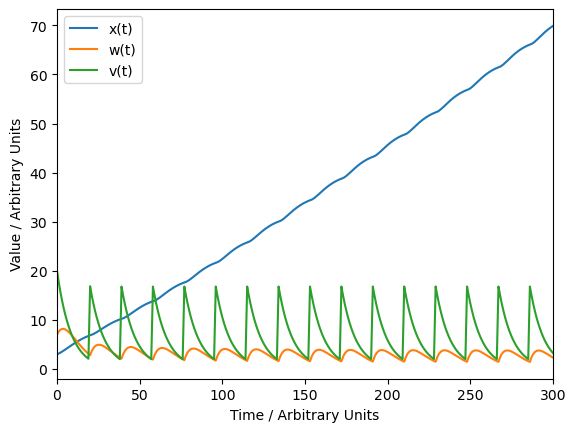

In [15]:
default_plotter = make_plotter()
default_plotter(3,7,20, irrigate = True)

Now that we have a more robust and customizable framework behind irrigation of our crops, we notice another problem with this model. The model uses the $m$ parameter as a constant to represent multiplicative plant degradation, but either this parameter is too small or the mathematical role it plays is insufficient. Hence, we can attempt to manipulate values of m by referencing the empirical data available to us.

## Manipulating $m$

To confirm that the current value of $m$ is insufficient to represent the limit of plant growth, we can try to run a simulation with time_endpoint = 1000 to check whether $x(t)$ plateus over time or continues increasing.

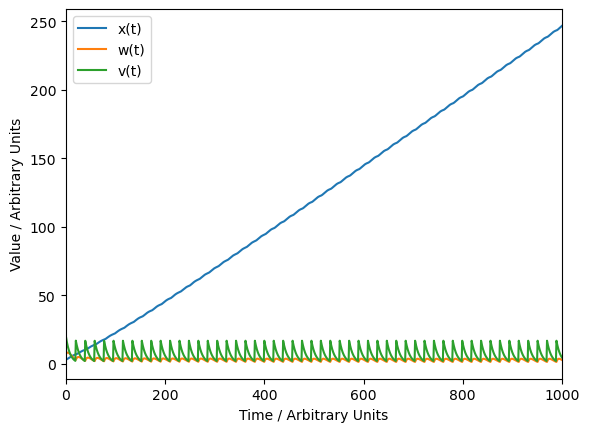

In [16]:
trial_plot_params = (0.01, 0.1, 0.00001, 1.5, 20, 0.1, 0.01, 0.000009, 1, 2, 15)
trial_plotter = make_plotter(trial_plot_params)
trial_plotter(3,7, 20, irrigate = True, time_endpoint = 1000)

As we have confirmed that this value of m is insufficient in modelling the fact that real plants gain dry mass more slowly as they age, we can try to find alternative values of m that produce a more reliable simulation.

Within the paper that we adapted this model from, another value of $m$ that was used was 0.01. In trying it out, we find that our model begins to better approximate the slowing rate of growth as plants age, such that plant dry mass does not increase linearly forever. We extend our time_endpoint to 1000 in the simulation below to check the behaviour of x(t) at large values of t.

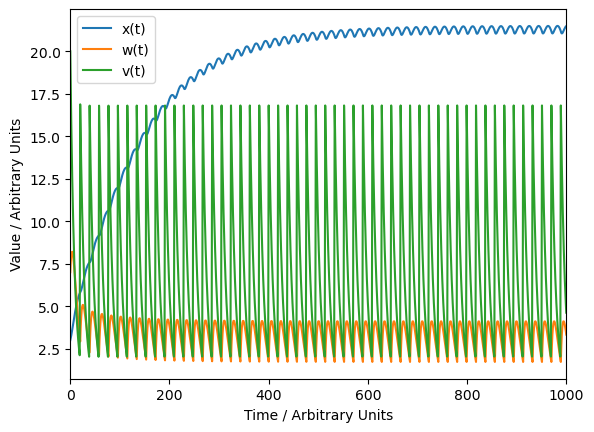

In [17]:
trial_plot_params = (0.01, 0.1, 0.01, 1.5, 20, 0.1, 0.01, 0.000009, 1, 2, 15)
trial_plotter = make_plotter(trial_plot_params)
trial_plotter(3,7, 20, irrigate = True, time_endpoint = 1000)

Since we have established that m = 0.01 is more suitable than m = 0.00001, we can make this minor change to our model and edit the function such that it takes this value of m as the default.

In [18]:
def make_plotter(param_iter = (0.01, 0.1, 0.01, 1.5, 20, 0.1, 0.01, 0.000009, 1, 2, 15)):
    '''
    A function that takes in an iterable param_iter of parameter values.
    Returns a plotter function that then takes in x(0), w(0), v(0), time_endpoint, and an irrigate boolean.
    This input iterable should consist of 11 items:
    (kappa, g, m, delta, r, beta, k, gamma, n, v_threshold, irrigation_qty)
    If you want to use default values for the parameters, call this function without an input parameter.
    The default values are:
    (0.01, 0.01, 0.00001, 1, 20, 0.1, 0.01, 0.000009, 1, 2, 15)
    '''
    def plot_plant_growth(x_0, w_0, v_0, time_endpoint = 300, irrigate = False):
        '''
        A function that takes in initial values of x(0), w(0), and v(0).
        Also takes in 2 optional arguments time_endpoint, an integer representing the number of ticks to run the program for.
        Second optional argument, irrigate, is a boolean that tells the function whether or not to irrigate the plant.
        Default parameters for these 2 arguments are 300 and False, respectively.
        Output is obvious: it just plots x(t), w(t), and v(t) over time.
        '''

        # Default Variables --- Only changeable by make_plotter() #
        
        intrin_growth = param_iter[0]          # kappa
        limit_factor_x = param_iter[1]         # g
        degrade_rate = param_iter[2]           # m
        intrin_water_inc = param_iter[3]       # delta
        limit_factor_w = param_iter[4]         # r
        plant_water_dec = param_iter[5]        # beta
        intrin_water_dec = param_iter[6]       # k
        pond_water_dec = param_iter[7]         # gamma
        n = param_iter[8]                      # extent of plant growth response to water
        v_threshold = param_iter[9]
        irrigation_qty = param_iter[10]
        
        # Generating our lists to hold all relevant values #

        hold_timepoints = [timepoint for timepoint in range(0, time_endpoint+1)]
        hold_x_val = [x_0]
        hold_w_val = [w_0]
        hold_v_val = [v_0]


        ### Filling up our lists of values ###

        for timepoint in hold_timepoints[1:]:          # going through every timepoint

            last_x = hold_x_val[-1]                    # find the x, w, v at the last timepoint
            last_w = hold_w_val[-1]
            last_v = hold_v_val[-1]

            lump_1 = last_x * last_w / (1 + limit_factor_x * last_x**n)
            lump_2 = intrin_water_inc * last_w * last_v / (1 + limit_factor_w * last_w)


            x_change = intrin_growth * lump_1 - degrade_rate * last_x
            w_change = lump_2 - plant_water_dec * last_w - intrin_water_dec * lump_1
            v_change = -pond_water_dec * last_v - intrin_water_inc * lump_2

            new_x = last_x + x_change
            new_w = last_w + w_change
            new_v = last_v + v_change
            
            if irrigate:                                # if the input tells us to irrigate    
                ### Irrigation Process ###
                if new_v < v_threshold:             
                    new_v += irrigation_qty
            
            if new_x < 0:                      # checking for negative x(t)
                new_x = 0
            if new_w < 0:                      # check negative w(t)
                new_w = 0
            if new_v < 0:                      # check negative v(t)
                new_v = 0
                
            hold_x_val.append(new_x)
            hold_w_val.append(new_w)
            hold_v_val.append(new_v)

        plt.plot(hold_timepoints, hold_x_val, label = "x(t)")
        plt.plot(hold_timepoints, hold_w_val, label = "w(t)")
        plt.plot(hold_timepoints, hold_v_val, label = "v(t)")
        plt.ylabel("Value / Arbitrary Units")
        plt.xlabel("Time / Arbitrary Units")
        plt.xlim(0, time_endpoint)
        plt.legend()
        plt.show()
    return plot_plant_growth

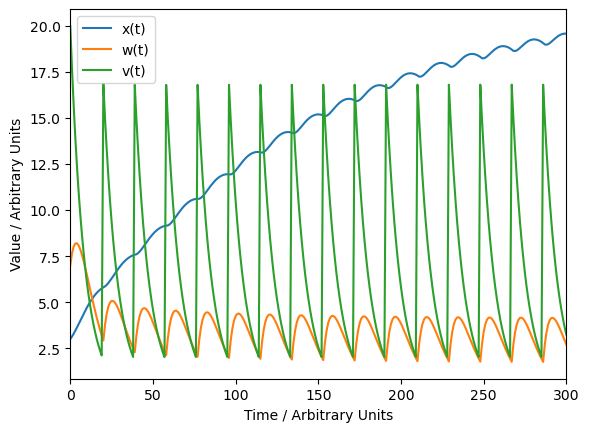

In [19]:
default_plotter = make_plotter()
default_plotter(3,7,20, irrigate = True)

## Overwatered Plants?

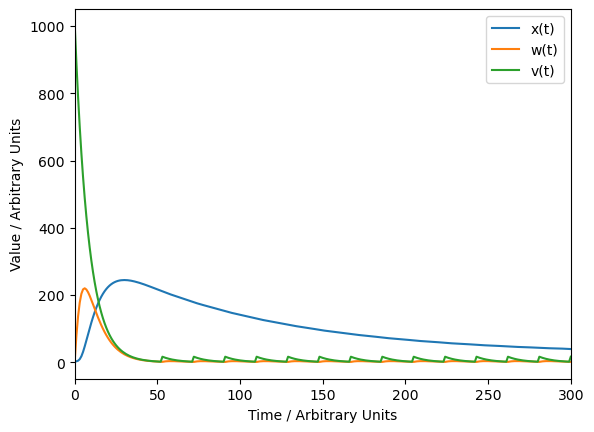

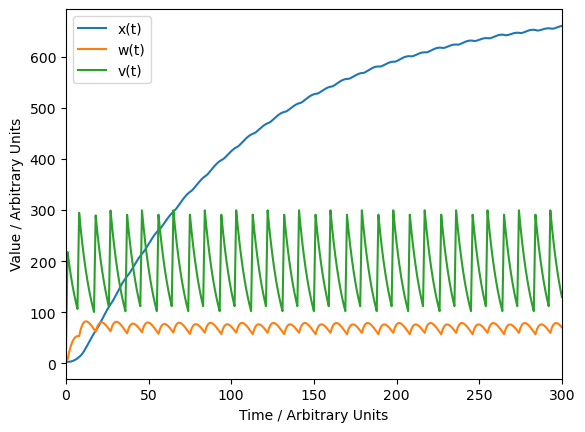

In [20]:
default_plotter(3,7,1000, irrigate = True)                 # initial massive amount of water in the soil

huge_irrigation_param = (0.01, 0.1, 0.01, 1.5, 20, 0.1, 0.01, 0.000009, 1, 100, 200)        # irrigating huge amounts of water
huge_irrigation_plotter = make_plotter(huge_irrigation_param)
huge_irrigation_plotter(3,7,20, irrigate = True)

From what we can see here, there is another problem with our current model. When we irrigate massively or there is a lot of water present in the soil, plant dry mass, $x(t)$, increases to a substantial extent. However, this is not representative of real plants, which become oxygen-deprived with excessive watering and begin to die due to rotting of their roots. 

As such, we could take in an additional parameter for our model that corresponds to the maximum amount of water that can be in the soil ($v(t)$) before the plant begins to die. An if-else conditional could be used to check v(t) against this parameter.

Below, we have introduced the parameter to be named as plant_drown.

In [21]:
def make_plotter(param_iter = (0.01, 0.1, 0.01, 1.5, 20, 0.1, 0.01, 0.000009, 1, 5, 15, 30)):
    '''
    A function that takes in an iterable param_iter of parameter values.
    Returns a plotter function that then takes in x(0), w(0), v(0), time_endpoint, and an irrigate boolean.
    This input iterable should consist of 12 items:
    (kappa, g, m, delta, r, beta, k, gamma, n, v_threshold, irrigation_qty, plant_drown)
    If you want to use default values for the parameters, call this function without an input parameter.
    The default values are:
    (0.01, 0.01, 0.00001, 1, 20, 0.1, 0.01, 0.000009, 1, 2, 15, 30)
    '''
    def plot_plant_growth(x_0, w_0, v_0, time_endpoint = 300, irrigate = False):
        '''
        A function that takes in initial values of x(0), w(0), and v(0).
        Also takes in 2 optional arguments time_endpoint, an integer representing the number of ticks to run the program for.
        Second optional argument, irrigate, is a boolean that tells the function whether or not to irrigate the plant.
        Default parameters for these 2 arguments are 300 and False, respectively.
        Output is obvious: it just plots x(t), w(t), and v(t) over time.
        '''

        # Default Variables --- Only changeable by make_plotter() #
        
        intrin_growth = param_iter[0]          # kappa
        limit_factor_x = param_iter[1]         # g
        degrade_rate = param_iter[2]           # m
        intrin_water_inc = param_iter[3]       # delta
        limit_factor_w = param_iter[4]         # r
        plant_water_dec = param_iter[5]        # beta
        intrin_water_dec = param_iter[6]       # k
        pond_water_dec = param_iter[7]         # gamma
        n = param_iter[8]                      # extent of plant growth response to water
        v_threshold = param_iter[9]
        irrigation_qty = param_iter[10]
        plant_drown = param_iter[11]
        
        # Generating our lists to hold all relevant values #

        hold_timepoints = [timepoint for timepoint in range(0, time_endpoint+1)]
        hold_x_val = [x_0]
        hold_w_val = [w_0]
        hold_v_val = [v_0]


        ### Filling up our lists of values ###

        for timepoint in hold_timepoints[1:]:          # going through every timepoint

            last_x = hold_x_val[-1]                    # find the x, w, v at the last timepoint
            last_w = hold_w_val[-1]
            last_v = hold_v_val[-1]

            lump_1 = last_x * last_w / (1 + limit_factor_x * last_x**n)
            lump_2 = intrin_water_inc * last_w * last_v / (1 + limit_factor_w * last_w)


            x_change = intrin_growth * lump_1 - degrade_rate * last_x
            w_change = lump_2 - plant_water_dec * last_w - intrin_water_dec * lump_1
            v_change = -pond_water_dec * last_v - intrin_water_inc * lump_2

            new_x = last_x + x_change
            new_w = last_w + w_change
            new_v = last_v + v_change
            
            if irrigate:                                # if the input tells us to irrigate    
                ### Irrigation Process ###
                if new_v < v_threshold:             
                    new_v += irrigation_qty
            
            if new_v > plant_drown:
                degrade_rate *= 2
            
            if new_x < 0:                      # checking for negative x(t)
                new_x = 0
            if new_w < 0:                      # check negative w(t)
                new_w = 0
            if new_v < 0:                      # check negative v(t)
                new_v = 0
                
            hold_x_val.append(new_x)
            hold_w_val.append(new_w)
            hold_v_val.append(new_v)

        plt.plot(hold_timepoints, hold_x_val, label = "x(t)")
        plt.plot(hold_timepoints, hold_w_val, label = "w(t)")
        plt.plot(hold_timepoints, hold_v_val, label = "v(t)")
        plt.ylabel("Value / Arbitrary Units")
        plt.xlabel("Time / Arbitrary Units")
        plt.xlim(0, time_endpoint)
        plt.legend()
        plt.show()
    return plot_plant_growth

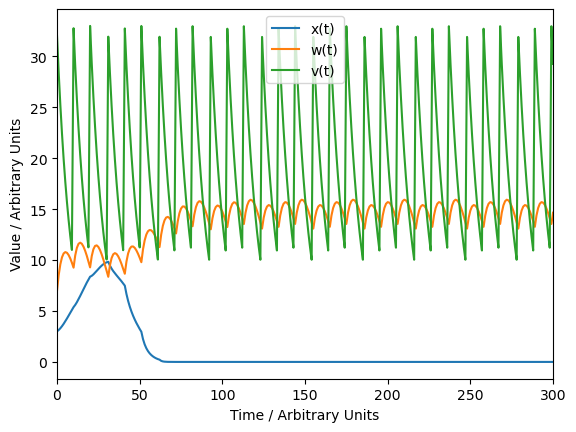

In [22]:
overwatered_params = (0.01, 0.1, 0.01, 1.5, 20, 0.1, 0.01, 0.000009, 1, 10, 23, 30)
overwatered_plotter = make_plotter(overwatered_params)
overwatered_plotter(3,7,32, irrigate = True)

Hey check it out if u overwater for too long the plant dies sadge